In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
!ls data

OEM_Emergency_Notifications.csv   tweets_3.csv
OEM_Non_Outages.csv               tweets_pseg_dec13_sep20.csv
final_df.csv                      tweets_pseg_jun27_apr06.csv
final_df_full.csv                 tweets_pseg_sep6_july2
merged_weather_tweets.csv         tweets_scrape_first_df.csv
nlp_tweets.csv                    weather_outage_merge.csv
nlp_tweets_2012_2017.csv          weather_target_drop_merged.csv
non_outages.csv                   weather_target_merged.csv
open_nyc.csv                      weather_target_numerical.csv
target.csv                        weather_target_numerical_drop.csv
tweets.csv                        working_df.csv
tweets_2.csv


In [23]:
df = pd.read_csv('./data/merged_weather_tweets.csv', index_col = 'datetime').drop(columns='Unnamed: 0')

In [24]:
df.shape

(45545, 43)

In [25]:
df.head(2)

,text,regex_clean_tweets,lemmed_tweet,temperature_f,wind_dir_degrees,wind_speed_mph,broken_clouds,drizzle,dust,few_clouds,...,smoke,snow,squalls,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_drizzle,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain,outage
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-06 13:00:00,Partial power outage at #MediaLoft That's...,Partial power outage MediaLoft That twice week...,Partial power outage MediaLoft That twice week...,61.55,56.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2012-10-12 01:00:00,"Um, can someone call ConEd , there's a power...",Um someone call ConEd power outage Bronx Sourc...,Um someone call ConEd power outage Bronx Sourc...,59.48,260.0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [29]:
df.index = pd.to_datetime(df.index)

In [37]:
# df.index.sort_index

In [34]:
df = df.sort_index()

In [41]:
# df.head()

In [40]:
weather_df = df.drop(columns = ['text', 'regex_clean_tweets', 'lemmed_tweet'])

In [42]:
df.groupby('outage').mean().T

outage,0.0,1.0
temperature_f,53.970204,58.685967
wind_dir_degrees,195.284930,162.395985
wind_speed_mph,6.800764,9.091241
broken_clouds,0.141009,0.091241
drizzle,0.004889,0.007299
dust,0.000444,0.001825
few_clouds,0.074027,0.058394
fog,0.023735,0.041971
freezing_rain,0.000133,0.000000
haze,0.015712,0.012774


In [45]:
# df.groupby('outage').mean().T < 0.5

In [46]:
# df['wind_speed_mph'].groupby(df['outage']).mean()

In [47]:
# df.datetime = pd.to_datetime(df.datetime)

In [48]:
# date_df = df.set_index('datetime').sort_index()

In [49]:
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook

# output_notebook()

In [50]:
# p = figure(plot_width=400, plot_height=400, x_axis_type="datetime")
# p.line(date_df.index, date_df['temperature_f'])

In [51]:
# show(p)

In [52]:
# date_df.index

In [16]:
# df_13 = date_df[(date_df.index > '2013-01-01') & (date_df.index < '2013-12-31')]

In [53]:
# p13 = figure(plot_width=550, plot_height=400, x_axis_type="datetime")
# p13.line(df_13.index, df_13['temperature_f'])
# show(p13)

In [54]:
# date_df.outage[date_df.outage == 1]

In [55]:
# import seaborn as sns
# plt.figure(figsize = (20, 10))
# sns.lmplot('datetime', 'temperature_f', df, hue='outage', fit_reg=False)
# # fig = plt.gcf()
# # fig.set_size_inches(25, 20)
# # plt.show()

In [64]:
# import seaborn as sns
# plt.figure(figsize = (20, 10))
# sns.lmplot(weather_df.index, 'temperature_f', weather_df, hue='outage', fit_reg=False)
# # fig = plt.gcf()
# # fig.set_size_inches(25, 20)
# # plt.show()

In [61]:
# import seaborn as sns
# plt.figure(figsize = (20, 10))
# sns.lmplot('datetime', 'temperature_f', df, hue='outage', fit_reg=False);
# # fig = plt.gcf()
# # fig.set_size_inches(25, 20)
# # plt.show()

In [62]:
# ax = sns.lineplot(x=date_df.index, y="temperature_f", hue="outage", data=date_df)

In [65]:
weather_df[weather_df['outage'] == 1].index

DatetimeIndex(['2012-10-04 05:00:00', '2012-10-04 10:00:00',
               '2012-10-04 15:00:00', '2012-10-08 15:00:00',
               '2012-10-13 11:00:00', '2012-10-19 03:00:00',
               '2012-10-19 14:00:00', '2012-10-21 00:00:00',
               '2012-10-27 18:00:00', '2012-10-27 18:00:00',
               ...
               '2017-09-05 19:00:00', '2017-09-07 15:00:00',
               '2017-09-09 12:00:00', '2017-09-24 07:00:00',
               '2017-09-29 12:00:00', '2017-10-07 12:00:00',
               '2017-10-12 05:00:00', '2017-10-12 12:00:00',
               '2017-10-13 13:00:00', '2017-10-22 19:00:00'],
              dtype='datetime64[ns]', name='datetime', length=548, freq=None)

In [66]:
weather_df.columns

Index(['temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'thunderstorm', 'thunderstorm_with_heavy_rain',
       'thunderstorm_with_light_drizzle', 'thunderstorm_with_light_rain',
       'thunderstorm_with_rain', 'very_heavy_rain', 'outage'],
      dtype='object')

In [107]:
# weather_df.temperature_f.plot(figsize = (14, 7))
# vlines = weather_df[weather_df['fog'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'red')

In [25]:
# dates = date_df.index.to_list()

In [26]:
# outages = date_df.outage.to_list()

In [27]:
# outage_coord = list(zip(dates, outages))

In [68]:
# len(outage_coord)

In [29]:
# x = []
# for i in range(6217):
#     for coordinate in outage_coord:
#         print(coordinate[i])

In [69]:
# outage_coord[0][0]

In [70]:
# outage_coord

In [71]:
one = weather_df[weather_df['outage'] == 1]

In [72]:
zero = weather_df[weather_df['outage'] == 0]

In [73]:
temp_1 = one.loc[:, ['temperature_f']]

In [74]:
temp_0 = zero.loc[:, ['temperature_f']]

In [75]:
weather_df.loc[:, ['outage', 'temperature_f']].head()

,outage,temperature_f
datetime,,
2012-10-01 13:00:00,0.0,59.11
2012-10-01 14:00:00,0.0,59.16
2012-10-01 15:00:00,0.0,59.30
2012-10-01 16:00:00,0.0,59.44
2012-10-01 17:00:00,0.0,59.58


In [76]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


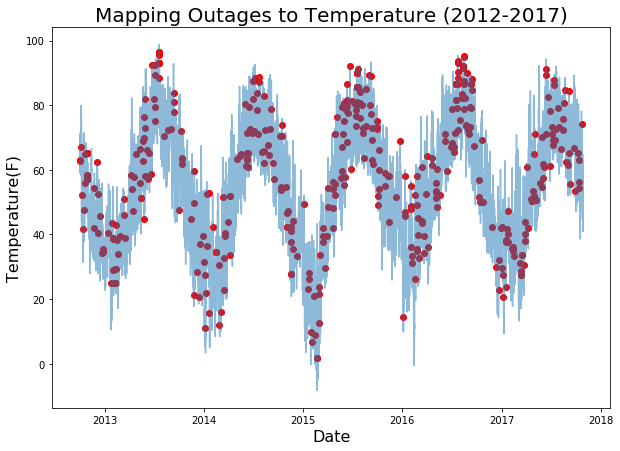

In [79]:
plt.figure(figsize=(10, 7))
plt.plot(weather_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Temperature (2012-2017)', fontsize=20)

plt.savefig('./images/outages_temp.png')

In [106]:
# plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
# plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
# vlines = weather_df[weather_df['thunderstorm'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'red', alpha = .25)
    
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Temperature(F)', fontsize=16)
# plt.title('Mapping Outages and Thunderstorms to Temperature (2012-2017)', fontsize=20)

# plt.savefig('./images/outages_temp_thunderstorms.png')

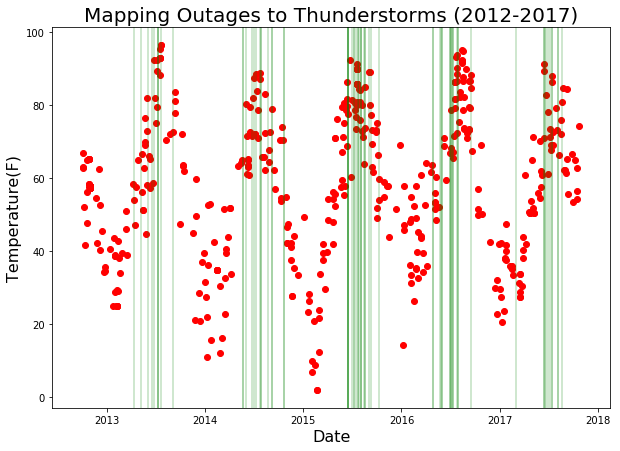

In [104]:
plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = weather_df[weather_df['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'green', alpha = .25)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Thunderstorms (2012-2017)', fontsize=20)

plt.savefig('./images/outages_thunderstorms.png')

In [105]:
# plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
# plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
# vlines = weather_df[weather_df['thunderstorm'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'red', alpha = 0.25)
# s_vlines = weather_df[weather_df['snow'] == 1].index
# for s_line in s_vlines:
#     plt.axvline(s_line, color = 'green', alpha = 0.25)
    
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Temperature(F)', fontsize=16)
# plt.title('Mapping Outages, Thunderstorms snd Snow to Temperature (2012-2017)', fontsize=20)


# plt.savefig('./images/outages_temp_thunderstorms_snow.png')

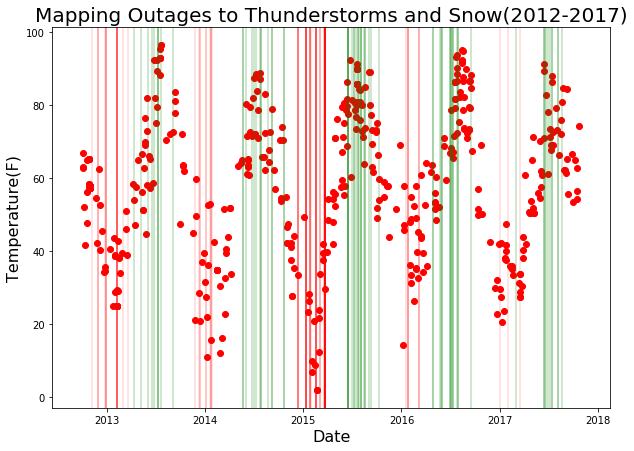

In [387]:
plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = weather_df[weather_df['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'green', alpha = 0.25)
s_vlines = weather_df[weather_df['snow'] == 1].index
for s_line in s_vlines:
    plt.axvline(s_line, color = 'red', alpha = 0.15)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Thunderstorms and Snow(2012-2017)', fontsize=20)


plt.savefig('./images/outages_thunderstorms_snow.png')

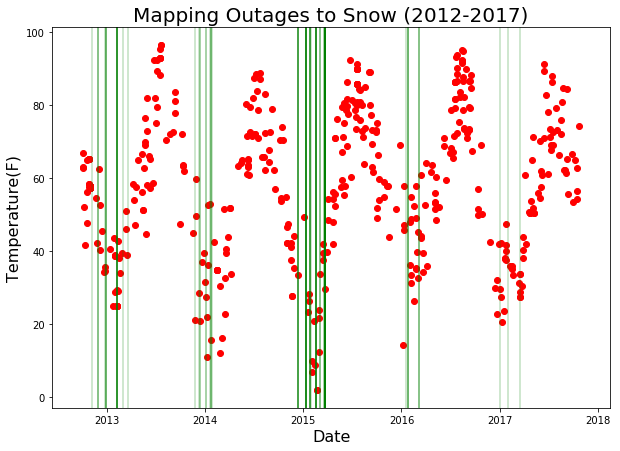

In [110]:
plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = weather_df[weather_df['snow'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'green', alpha = 0.25)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Snow (2012-2017)', fontsize=20)


plt.savefig('./images/outages_temp_snow.png')

In [43]:
# date_df.temperature_f.resample('M').mean().plot()

In [91]:
# df_15_17 = weather_df[(weather_df.index > '2015-01-01') & (weather_df.index < '2017-12-31')]

In [92]:
# temp_one_15_17 = temp_1[(temp_1.index > '2015-01-01') & (temp_1.index < '2017-12-31')]

In [114]:
# plt.figure(figsize=(10, 7))
# # plt.plot(temp_one_15_17.temperature_f, alpha = 0.5)
# plt.scatter(temp_one_15_17.index, temp_one_15_17['temperature_f'], c ='r')
# vlines = df_15_17[df_15_17['thunderstorm'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'green', alpha = 0.25)
    
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Temperature(F)', fontsize=16)
# plt.title('Mapping Outages to Thunderstorms(2015-2017)', fontsize=20)


# plt.savefig('./images/outages_temp_thunderstorms_15_17.png')

In [115]:
df_15_16 = weather_df[(weather_df.index > '2015-01-01') & (weather_df.index < '2016-12-31')]

In [116]:
temp_one_15_16 = temp_1[(temp_1.index > '2015-01-01') & (temp_1.index < '2016-12-31')]

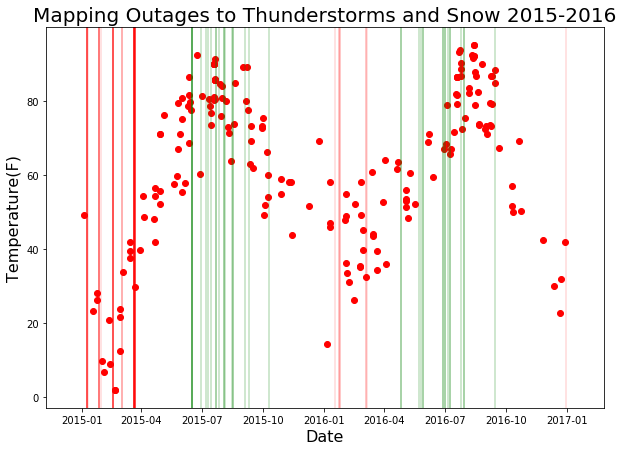

In [119]:
plt.figure(figsize=(10, 7))
# plt.plot(temp_one_15_16.temperature_f, alpha = 0.5)
plt.scatter(temp_one_15_16.index, temp_one_15_16['temperature_f'], c ='r')
vlines = df_15_16[df_15_16['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'green', alpha = 0.25)
s_vlines = df_15_16[df_15_16['snow'] == 1].index
for s_line in s_vlines:
    plt.axvline(s_line, color = 'red', alpha = 0.15)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Thunderstorms and Snow 2015-2016', fontsize=20)


plt.savefig('./images/outages_temp_thunderstorms_snow_15_16.png')

In [120]:
wind_1 = one.loc[:, ['wind_speed_mph']]

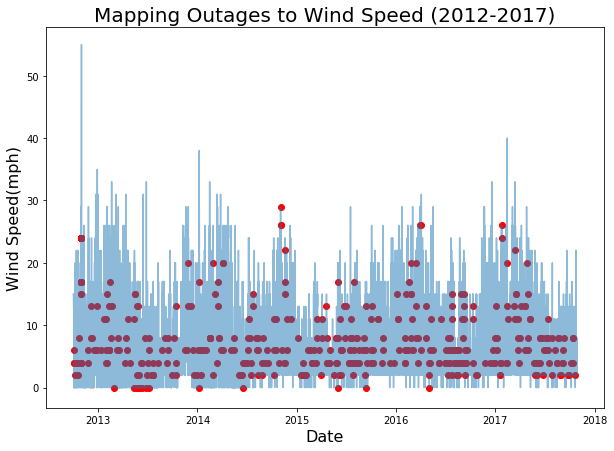

In [123]:
plt.figure(figsize=(10, 7))
plt.plot(weather_df.wind_speed_mph, alpha = 0.5)
plt.scatter(wind_1.index, wind_1['wind_speed_mph'], c ='r')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Wind Speed(mph)', fontsize=16)
plt.title('Mapping Outages to Wind Speed (2012-2017)', fontsize=20)

plt.savefig('./images/outages_wind_speed.png')

In [124]:
# !ls Weather/data

In [125]:
# weather = pd.read_csv('./Weather/data/weather_clean.csv')

In [126]:
# weather.columns

In [127]:
# weather.wind_speed_mph
# weather.head()

In [128]:
# weather.date = pd.to_datetime(weather.date)

In [129]:
# weather = weather.set_index('date').sort_index()

In [130]:
# plt.figure(figsize = (10, 7))

# plt.plot(date_df.wind_speed_mph);
# plt.scatter(wind_1.index, wind_1['wind_speed_mph'], c ='r')


In [131]:
# plt.figure(figsize=(10, 7))

# sns.lineplot(x= date_df.index, y='temperature_f', data=date_df)
# sns.scatterplot(x= temp_1.index, y='temperature_f', data = temp_1)

In [63]:
# one_16 = one['2016']

In [66]:
# temp_16 = temp_1['2016']

In [69]:
# date_df_16 = date_df['2016']

In [132]:
# plt.figure(figsize=(10, 7))
# plt.plot(temp_16.temperature_f, alpha = 0.5)
# plt.scatter(temp_16.index, temp_16['temperature_f'], c ='r')
# vlines = date_df_16[date_df_16['thunderstorm'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'red')
    
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Temperature(F)', fontsize=16)
# plt.title('Mapping Outages and Thunderstorms to Temperature (2015-2017)', fontsize=20)


# # plt.savefig('./images/outages_temp_thunderstorms_15_17.png')

In [133]:
# one_16['2016-07']

In [135]:
# one.resample('M').mean()

In [137]:
# one['outage'].value_counts()

In [139]:
# one['2016-07']

In [140]:
years = ['2012', '2013', '2014', '2015', '2016', '2017']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [110]:
# one['Month/Year'] = one['Timestamp']apply(lambda x: "%d/%d" % (x.month, x.year))

In [141]:
lst_df_year = []
for year in years:
    lst_df_year.append(weather_df[year])

In [142]:
lst_df_ones = []
for i in range(6):
    for column in weather_df.columns:
        lst_df_ones.append(lst_df_year[i][lst_df_year[i][column]==1])

In [144]:
len(lst_df_ones)

240

In [145]:
len(weather_df.columns)

40

In [147]:
# len(lst_df_ones[0])

In [148]:
sub_dfs =[]
for df in lst_df_ones:
    sub_dfs.append(weather_df.index.month.value_counts().sort_index())

In [150]:
# [weather_df['2012-11-10']['drills/exercises'] == 1]

In [153]:
sub_dfs

[1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    390

In [295]:
one_2012 = sub_dfs[0:57]
one_2013 = sub_dfs[57:114]
one_2014 = sub_dfs[114:171]
one_2015 = sub_dfs[171:228]
one_2016 = sub_dfs[228:285]
one_2017 = sub_dfs[285:342]

In [195]:
type(years)

list

In [206]:
df_years = []
for year in years:
    df_years.append(one[year])

In [212]:
# df_years[0]

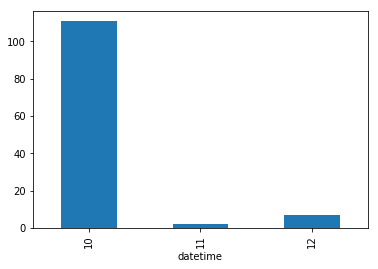

In [215]:
df_years[0].groupby(df_years[0].index.month).count()['outage'].plot(kind = 'bar');

In [216]:
#

0
1
2
3
4
5


In [257]:
df_years[0].groupby(df_years[0].index.month).count()['outage']

datetime
10    111
11      2
12      7
Name: outage, dtype: int64

In [258]:
df_years[1].groupby(df_years[1].index.month).count()['outage']

datetime
1      6
2     12
3      3
4      5
5     12
6      6
7     12
8      2
9      5
10     4
11     4
12     4
Name: outage, dtype: int64

In [310]:
str(df_years[0].index.year.value_counts().index).replace('Int64Index([','').replace("], dtype='int64')", "")

'2012'

In [354]:
label_2012 = ['Oct', 'Nov', 'Dec']
months = ['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [383]:
!ls

01_Data_Gathering.ipynb                 Open_NYC_Non_Outages.ipynb
Appendix_A_Twitter_Scraper_Issues.ipynb Untitled.ipynb
Client_Project_Ixchel.ipynb             Weather
Client_Project_John.ipynb               data
Client_Project_Kevin.ipynb              images
EDA_Weather_Outage.ipynb                mycsv.csv
EDA_Weather_Outage_Merged.ipynb         raw_tweets
Ixchel_Twitter.ipynb                    saved_tweets.csv
Merge_Notebook.ipynb                    tweet
Merge_Weather_and_Tweets.ipynb          tweets_scrape_first_df.csv
Modeling.ipynb                          twitter_credentials.json
New_Merge.ipynb                         working_df.csv
NotifyNYC_Tweets_OpenNYC.ipynb          working_df_without_retweets.csv
NotifyNYC_tweets.csv


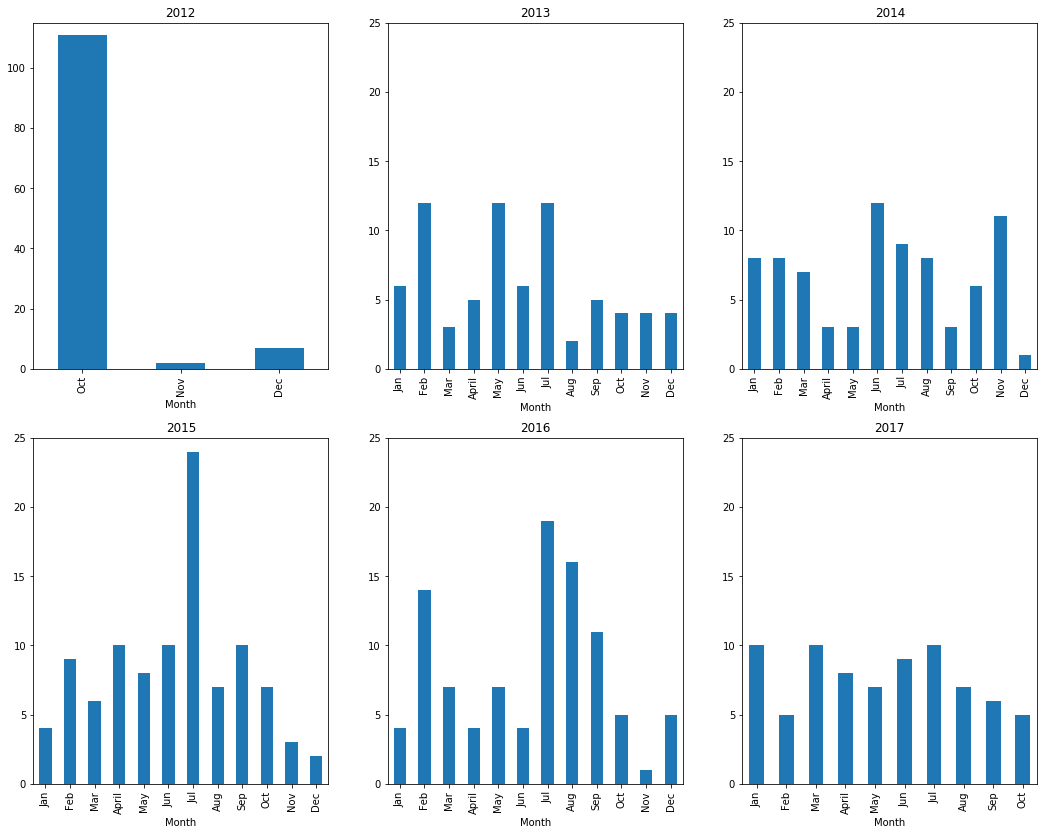

In [385]:
fig, ax = plt.subplots(
    nrows = 2,
    ncols = 3,
    figsize = (18, 14)


)

ax[0][0].set_xticklabels(label)
counter = 0
for i in range(3):

    df_years[i].groupby(df_years[i].index.month).count()['outage'].plot(kind = 'bar',
                                                                        ylim = (0, 25),
                                                                        ax = ax[0][counter],
                                                                        title = str(df_years[i].index.year.value_counts().index).replace('Int64Index([','').replace("], dtype='int64')", ""))

    counter += 1

df_years[0].groupby(df_years[0].index.month).count()['outage'].plot(
                                                                    kind = 'bar',
                                                                    ylim = (0, 115),
                                                                    ax = ax[0][0],
                                                                    title = str(df_years[0].index.year.value_counts().index).replace('Int64Index([','').replace("], dtype='int64')", ""))
    
counter = 0
for i in range(3,6): 
    df_years[i].groupby(df_years[i].index.month).count()['outage'].plot(kind = 'bar',
                                                                        ylim = (0, 25),
                                                                        ax = ax[1][counter],
                                                                        title = str(df_years[i].index.year.value_counts().index).replace('Int64Index([','').replace("], dtype='int64')", ""))
    counter += 1
    
ax[0][0].set_xticklabels(label_2012)
ax[0][0].set(xlabel ='Month')

for x in range(1,3):
    ax[0][x].set_xticklabels(months)
    ax[0][x].set_xlabel('Month')
    
for x in range(0,3):
    ax[1][x].set_xticklabels(months)
    ax[1][x].set_xlabel('Month')

fig.savefig('./images/subplots.png')
# df['temperature_f'].plot(kind = 'hist', 
#                          ax = ax[0], 
#                          title = 'Temperature in Fahrenheit'),

# df['wind_dir_degrees'].plot(kind = 'hist', 
#                          ax = ax[1], 
#                          title = 'Wind Direction (Angle Degrees)');

# df['wind_speed_mph'].plot(kind = 'hist', 
#                          ax = ax[2], 
#                          title = 'Wind Speed in Miles per Hour');

In [219]:
grouped_years = []
for year in range(6):
    grouped_years.append(df_years[year].groupby(df_years[year].index.month).count()['outage'])

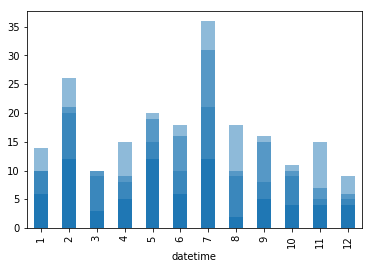

In [241]:
grouped_years[1].plot(kind = 'bar')
grouped_years[2].plot(kind = 'bar', alpha = 0.5, bottom = grouped_years[1])
grouped_years[3].plot(kind = 'bar', alpha = 0.5, bottom = grouped_years[1])
grouped_years[4].plot(kind = 'bar', alpha = 0.5, bottom = grouped_years[1])



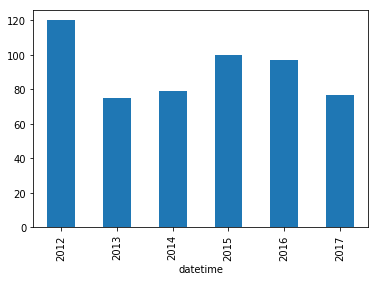

In [194]:
one.groupby(one.index.year).count()['outage'].plot(kind = 'bar')

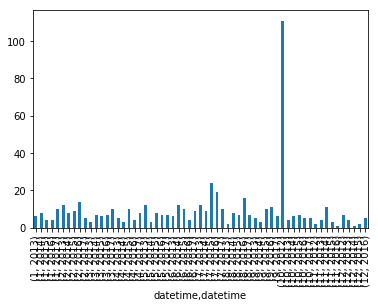

In [190]:
one.groupby([one.index.month, one.index.year]).count()['outage'].plot(kind = 'bar')

In [181]:
one.head()

,temperature_f,wind_dir_degrees,wind_speed_mph,broken_clouds,drizzle,dust,few_clouds,fog,freezing_rain,haze,...,smoke,snow,squalls,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_drizzle,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain,outage
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-04 05:00:00,62.65,30.0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2012-10-04 10:00:00,63.08,330.0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2012-10-04 15:00:00,66.95,40.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2012-10-08 15:00:00,52.07,0.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2012-10-13 11:00:00,41.65,240.0,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [174]:
for year in years:
    print(one[year].index.month.value_counts().sort_index())

10    111
11      2
12      7
Name: datetime, dtype: int64
1      6
2     12
3      3
4      5
5     12
6      6
7     12
8      2
9      5
10     4
11     4
12     4
Name: datetime, dtype: int64
1      8
2      8
3      7
4      3
5      3
6     12
7      9
8      8
9      3
10     6
11    11
12     1
Name: datetime, dtype: int64
1      4
2      9
3      6
4     10
5      8
6     10
7     24
8      7
9     10
10     7
11     3
12     2
Name: datetime, dtype: int64
1      4
2     14
3      7
4      4
5      7
6      4
7     19
8     16
9     11
10     5
11     1
12     5
Name: datetime, dtype: int64
1     10
2      5
3     10
4      8
5      7
6      9
7     10
8      7
9      6
10     5
Name: datetime, dtype: int64


In [161]:
pd.DataFrame(one.index.month.value_counts().sort_index(), 
             index = one.index.month.drop_duplicates()).rename(columns = {'datetime': 'outage'})

,outage
datetime,
10,138
11,21
12,19
1,32
2,48
3,33
4,30
5,37
6,41


In [148]:
date_weather_dict = date_df[date_df['thunderstorm'] == 1]['2016'].index.value_counts().sort_index().to_dict()

In [158]:
date_weather_dict

{Timestamp('2016-04-26 08:00:00'): 1,
 Timestamp('2016-05-25 22:00:00'): 1,
 Timestamp('2016-07-01 21:00:00'): 1,
 Timestamp('2016-07-06 08:00:00'): 1,
 Timestamp('2016-07-09 00:00:00'): 1}

In [164]:
date_df[date_df['outage'] == 1]['outage']

datetime
2012-10-04 05:00:00    1
2012-10-04 10:00:00    1
2012-10-04 15:00:00    1
2012-10-08 15:00:00    1
2012-10-13 11:00:00    1
2012-10-19 03:00:00    1
2012-10-19 14:00:00    1
2012-10-21 00:00:00    1
2012-10-27 18:00:00    1
2012-10-29 07:00:00    1
2012-10-29 08:00:00    1
2012-10-29 20:00:00    1
2012-10-29 21:00:00    1
2012-10-29 22:00:00    1
2012-11-22 20:00:00    1
2012-11-24 14:00:00    1
2012-12-04 19:00:00    1
2012-12-06 12:00:00    1
2012-12-08 20:00:00    1
2012-12-15 22:00:00    1
2012-12-21 07:00:00    1
2012-12-26 06:00:00    1
2012-12-27 01:00:00    1
2013-01-12 00:00:00    1
2013-01-23 06:00:00    1
2013-01-29 20:00:00    1
2013-01-30 23:00:00    1
2013-01-31 03:00:00    1
2013-01-31 06:00:00    1
2013-02-02 14:00:00    1
                      ..
2017-06-26 09:00:00    1
2017-06-28 21:00:00    1
2017-07-05 13:00:00    1
2017-07-07 04:00:00    1
2017-07-07 11:00:00    1
2017-07-08 08:00:00    1
2017-07-13 20:00:00    1
2017-07-13 21:00:00    1
2017-07-15 00:00